In [1]:
#Import Relevant libraries
#!conda install -c conda-forge imbalanced-learn
import numpy as np
import pandas as pd
import sklearn
import imblearn
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load wine data set.
pima_df = pd.read_csv("dataset/pima-indians-diabetes.csv", header = None)
cols = [ "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
        "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome" ]
pima_df.columns = cols


In [4]:
pima_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [17]:
pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Visualization

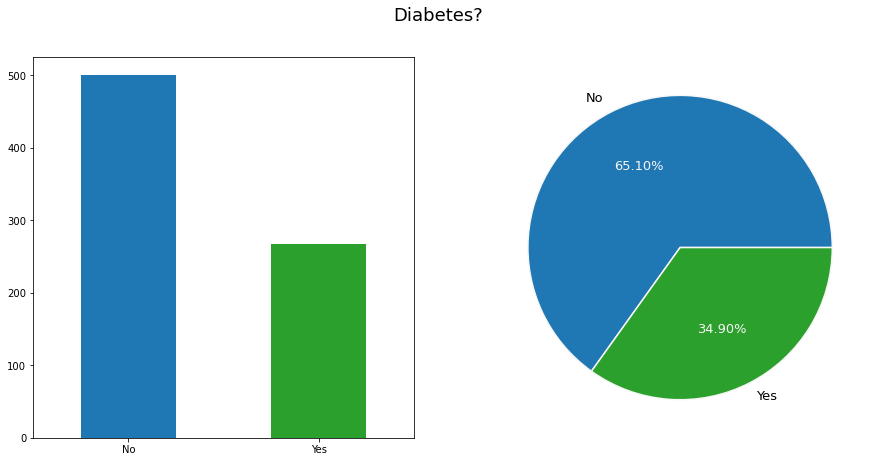

In [7]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Diabetes?", fontsize = 18.)
_ = pima_df.Outcome.value_counts().plot.bar(ax = ax[0], rot = 0, 
                                       color = (sns.color_palette()[0], 
                                                sns.color_palette()[2])).set(xticklabels = ["No", "Yes"])
_ = pima_df.Outcome.value_counts().plot.pie(labels = ("No", "Yes"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

<h3>Histograms</h3>

Using histograms we can quickly visualize the distributions of the values of the features:


<ipython-input-22-4ba30609e7d9>:2: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout( True )


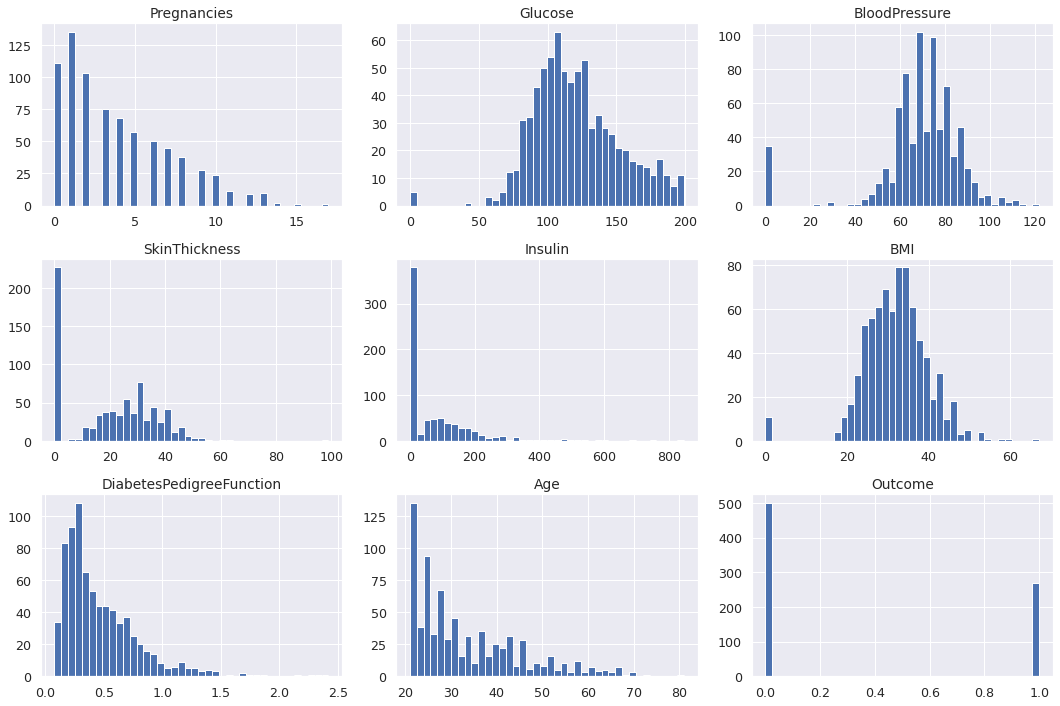

In [22]:
pima_df.hist( bins=40, figsize=( 15.0, 10.0 ) )
plt.tight_layout( True )
plt.show()


<h3>Dist Plot</h3>

Dist Plot helps us to flexibly plot a univariate distribution of observations.



<h3>Pair Plots</h3>

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our dataset.


/home/william/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/william/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/william/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

<AxesSubplot:xlabel='BMI', ylabel='Density'>

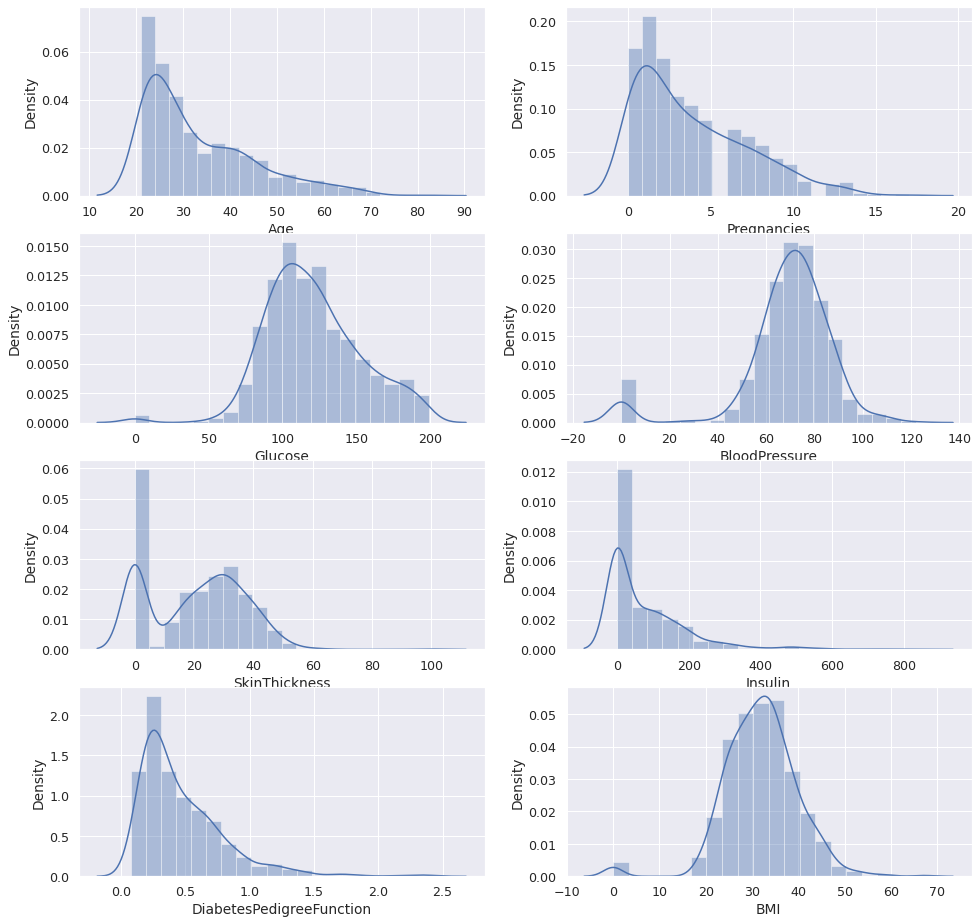

In [16]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(pima_df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(pima_df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(pima_df.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(pima_df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(pima_df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(pima_df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(pima_df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(pima_df.BMI, bins = 20, ax=ax[3,1]) 


<AxesSubplot:xlabel='SkinThickness', ylabel='Insulin'>

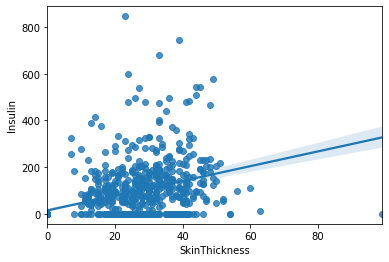

In [9]:
sns.regplot(x='SkinThickness', y= 'Insulin', data=pima_df)


<h3>Pair Plots</h3>

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our dataset.


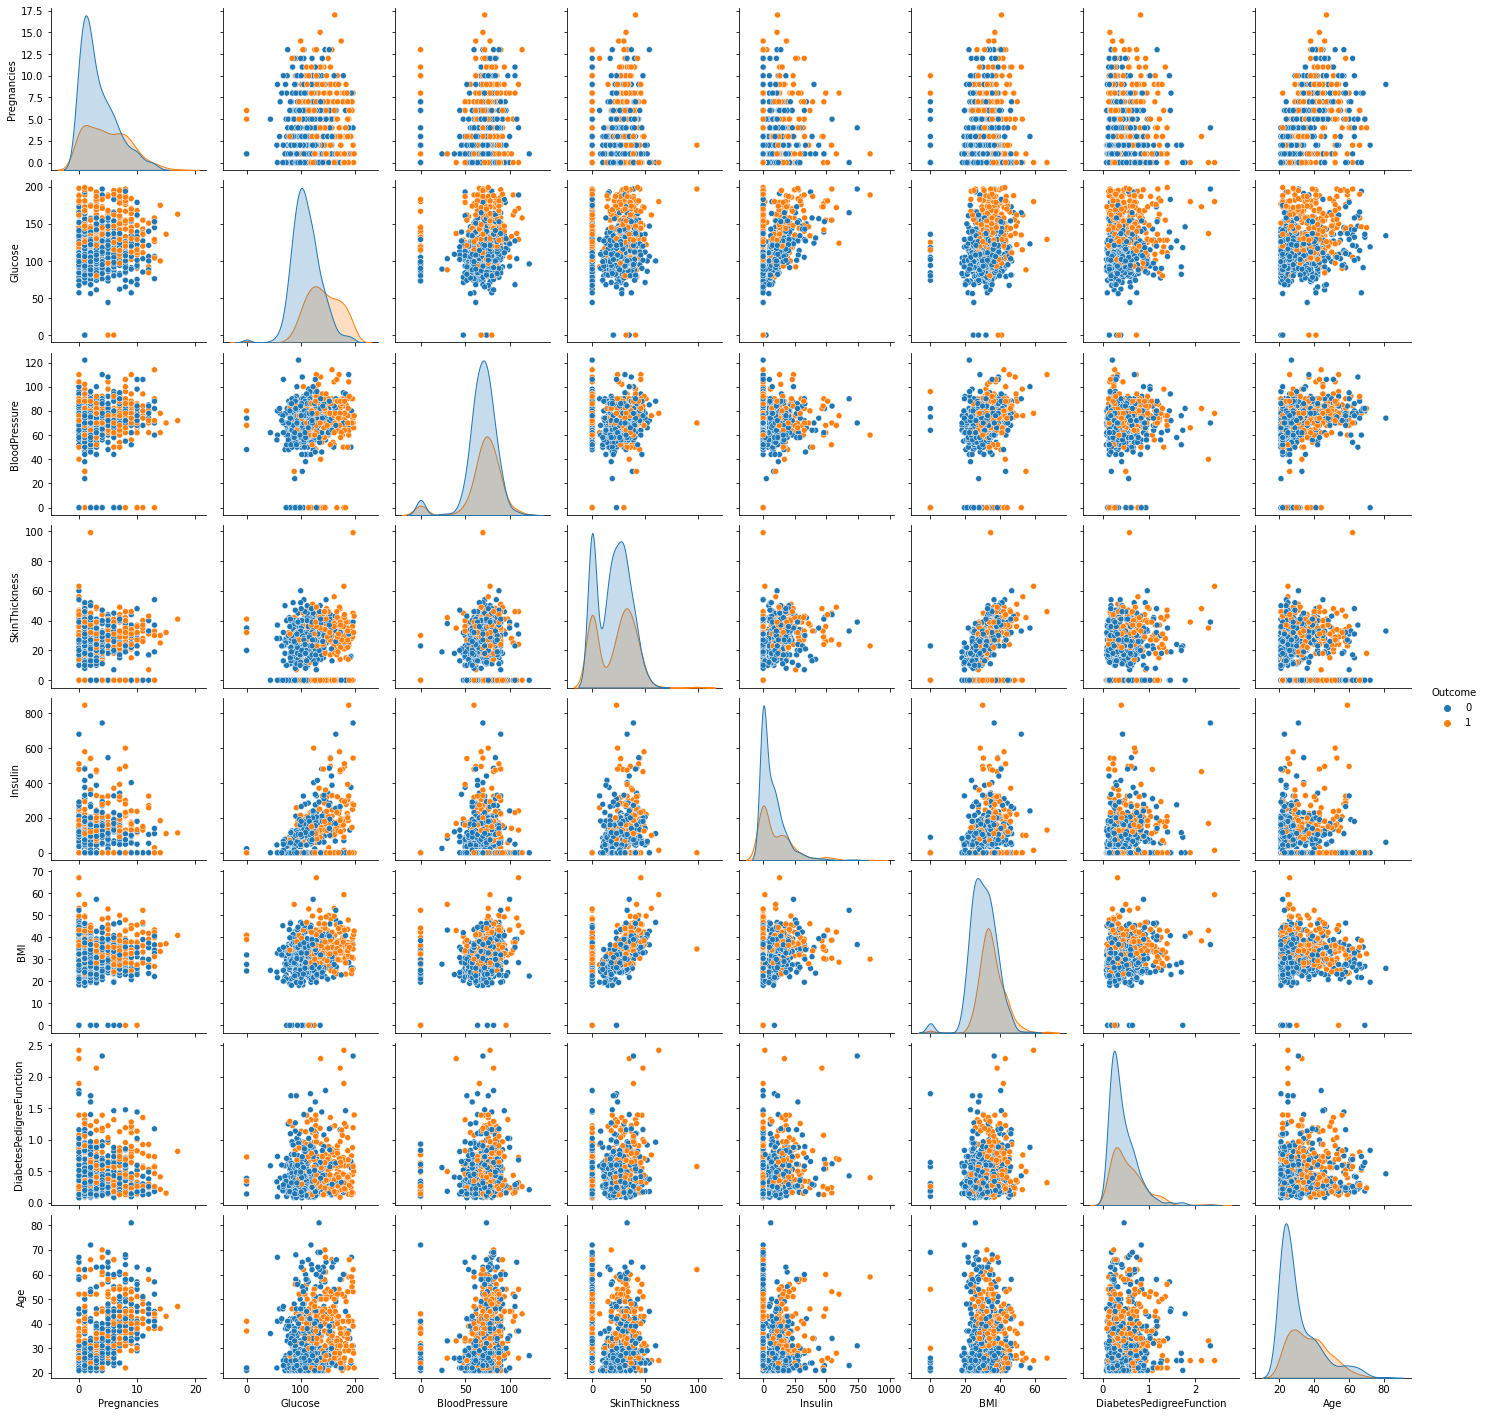

In [11]:
sns.pairplot(data=pima_df,hue='Outcome')

<h3>Correlation between features</h3>

Variables within a dataset can be related for lots of reasons. It can be useful in data analysis and modeling to better understand the relationships between variables. The statistical relationship between two variables is referred to as their correlation.

A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neural or zero, meaning that the variables are unrelated.


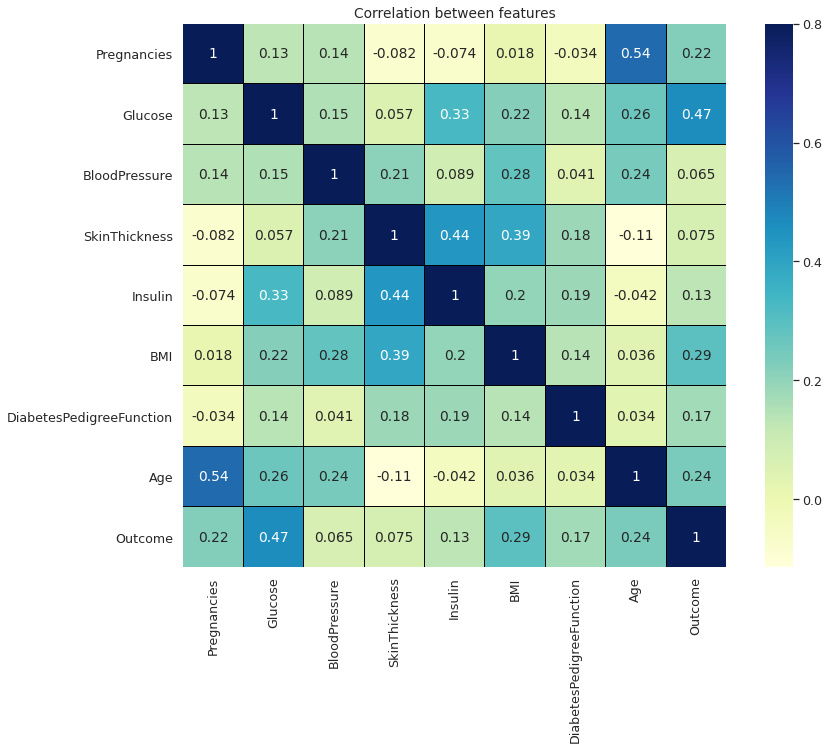

In [12]:
corr=pima_df.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features');
